PREDICTING DRUG EFFECTIVENESS USING DECISION TREE ALGORITHM


Objectives
After completing this lab you will be able to:

Develop a classification model using Decision Tree Algorithm
In this project, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

IMPORT THE REQUIRED LIBRARIES

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

About the dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.About the dataset.



Downloading the Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [30]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'


Now, read the data using pandas dataframe:

In [79]:
df = pd.read_csv(path)

Use the method head to display the first 5 columns of the dataframe

In [80]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Determine the size of the data using the df.shape

In [82]:
df.shape

(200, 6)

Display the data types of each column using the attribute dtype

In [84]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Display the data info of each column using the method info

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Use the method describe to obtain a statistical summary of the dataframe.

In [38]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Check the column names using df.columns

In [35]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Use the method isnull to identify missing values in the dataset.

In [85]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Check the value of descriptive statistics for continuous variable

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


Check if there are duplicate rows in the dataset

In [42]:
df.duplicated().sum()

0

Use the function boxplot in the seaborn library to Check for outliers in each column.

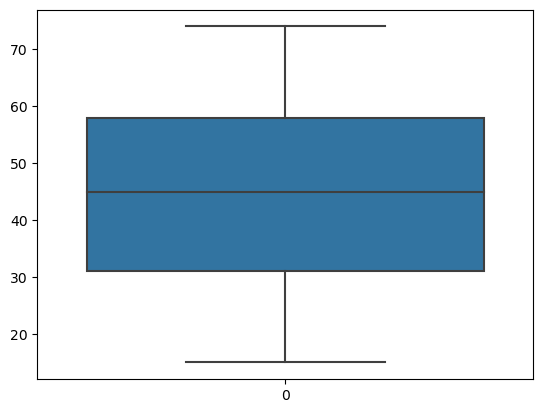

In [43]:
sns.boxplot(df['Age'])
plt.show();

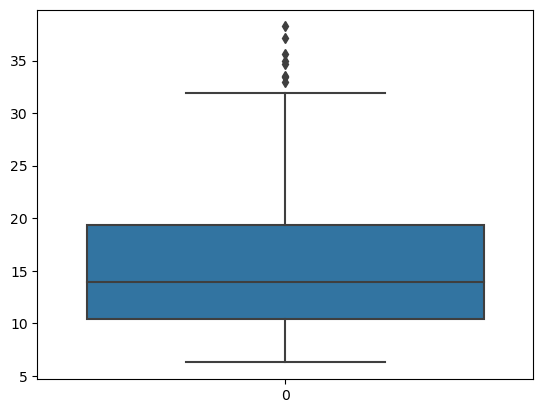

In [44]:
sns.boxplot(df['Na_to_K'])
plt.show()

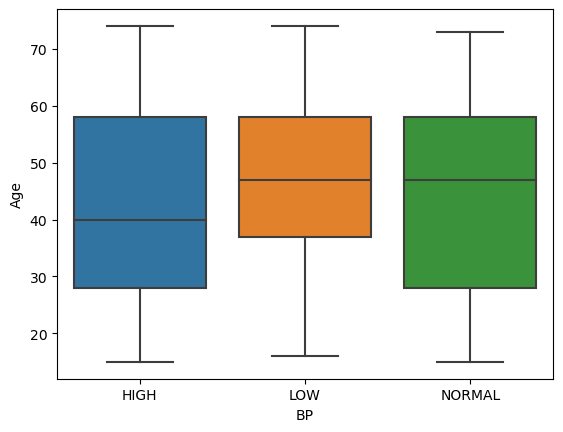

In [45]:
sns.boxplot(x='BP',y ='Age', data = df)
plt.show()

We can plot each of these features using histogram:

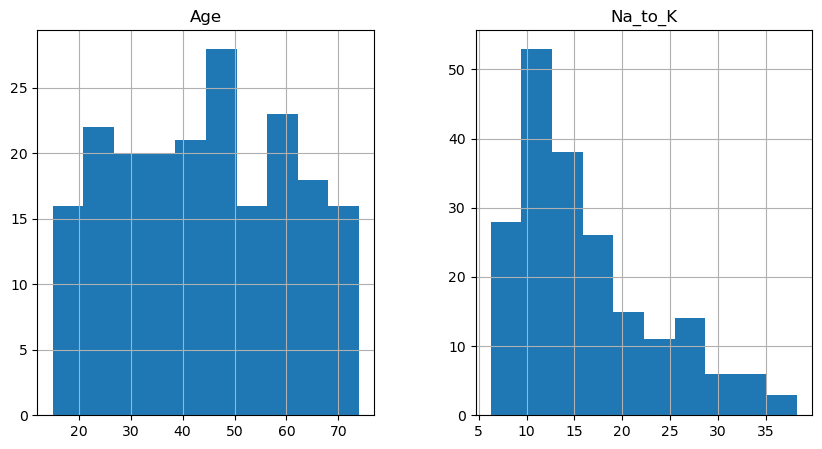

In [46]:
df.hist(figsize=(10,5))
plt.show();

Next we create crosstabs

In [47]:
pd.crosstab(df['Sex'],df['BP'],margins =True)

BP,HIGH,LOW,NORMAL,All
Sex,,,,
F,38,28,30,96
M,39,36,29,104
All,77,64,59,200


Plot using bar chart

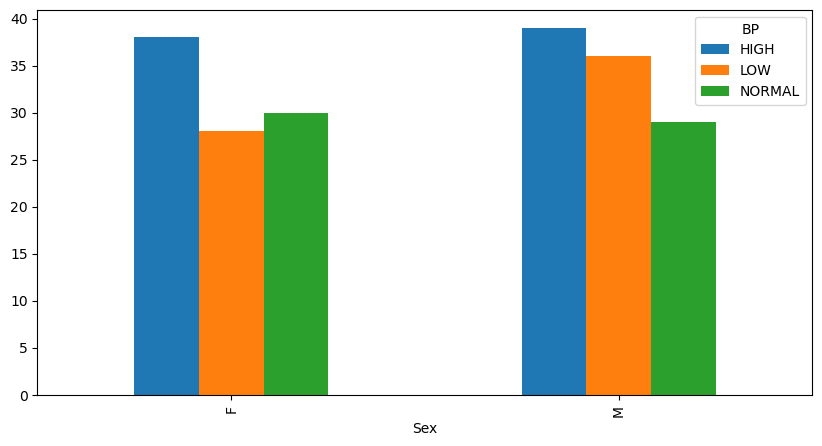

In [48]:
pd.crosstab(df['Sex'],df['BP']).plot(kind = 'bar', figsize = (10,5))
plt.show();

In [49]:
pd.crosstab(df['Sex'],df['Cholesterol'], margins = True)

Cholesterol,HIGH,NORMAL,All
Sex,,,
F,49,47,96
M,54,50,104
All,103,97,200


Plot using pie chart

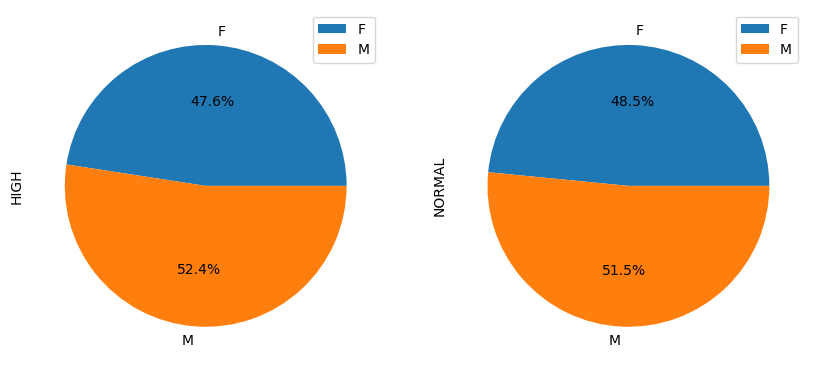

In [50]:
pd.crosstab(df['Sex'],df['Cholesterol']).plot(kind= 'pie',subplots=True, figsize=(10,5),autopct = '%0.1f%%')
plt.show()

In [51]:
pd.crosstab(df['Sex'],df['Drug'], margins = True)

Drug,drugA,drugB,drugC,drugX,drugY,All
Sex,,,,,,
F,9,6,7,27,47,96
M,14,10,9,27,44,104
All,23,16,16,54,91,200


Plot using bar chart

<Axes: xlabel='Sex'>

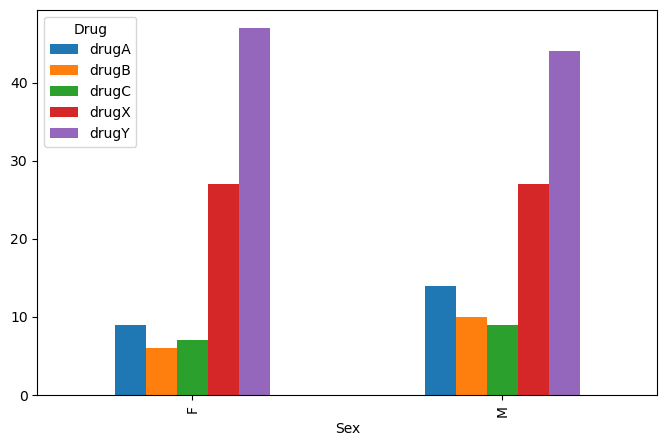

In [52]:
pd.crosstab(df['Sex'],df['Drug']).plot(kind = 'bar', figsize = (8,5))

In [53]:
pd.crosstab(df['Cholesterol'],df['Drug'],margins = True)

Drug,drugA,drugB,drugC,drugX,drugY,All
Cholesterol,,,,,,
HIGH,12,8,16,20,47,103
NORMAL,11,8,0,34,44,97
All,23,16,16,54,91,200


Plot using bar chart

<Axes: xlabel='Cholesterol'>

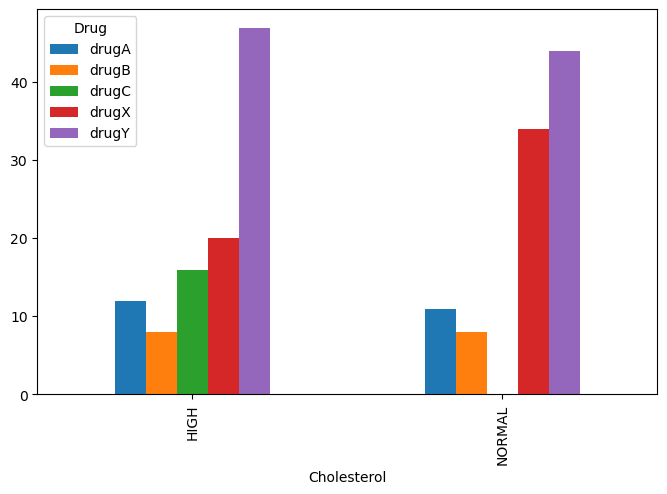

In [54]:
pd.crosstab(df['Cholesterol'],df['Drug']).plot(kind= 'bar', figsize=(8,5))

In [55]:
pd.crosstab(df['BP'],df['Drug'],margins = True)

Drug,drugA,drugB,drugC,drugX,drugY,All
BP,,,,,,
HIGH,23,16,0,0,38,77
LOW,0,0,16,18,30,64
NORMAL,0,0,0,36,23,59
All,23,16,16,54,91,200


Plot using bar chart

<Axes: xlabel='BP'>

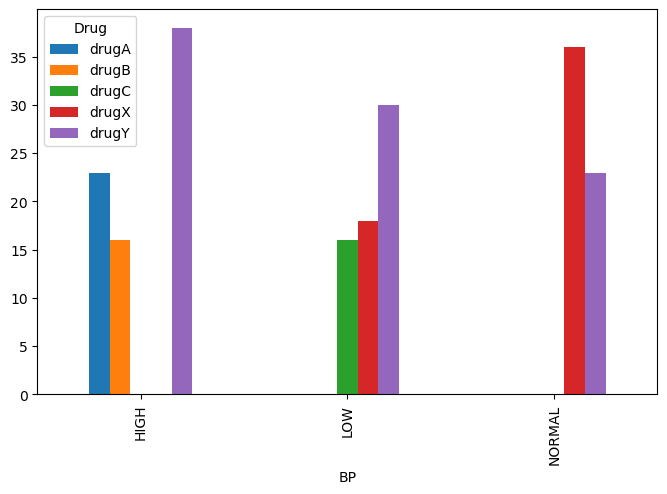

In [56]:
pd.crosstab(df['BP'],df['Drug']).plot(kind = 'bar', figsize=(8,5))

Pre-processing

Using df as the Drug.csv data read by pandas, declare the following variables:

.X as the Feature Matrix (data of my_data)

.y as the response vector (target)

Remove the column containing the target name since it doesn't contain numeric values.
Note that the column containing the target name is "Drug"

In [36]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as Sex or BP. Unfortunately, 
Sklearn Decision Trees does not handle categorical variables. 

We can still convert these features to numerical values using pandas.get_dummies() 
to convert the categorical variable into dummy/indicator variables.

We can mainly two types Encoding. we use:

1. Label Encoding 

2. One hot Encoding. 

Both are call from sklearn library 

--for onehot encoding, from sklearn from sklearn.preprocessing import OneHotEncoder 

--for LabelEncoder sklearn, from sklearn.preprocessing import LabelEncoder.

The LabelEncoder get_dummies() function is used to convert categorical variable into dummy/indicator variables.

In [58]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Alternatively, we can use

In [59]:
label_encoder = LabelEncoder()
df ['Sex'] = label_encoder.fit_transform(df['Sex'])
df ['BP'] = label_encoder.fit_transform(df['BP'])
df ['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

we can view a few rows using method head

In [60]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Now split the data set into training set & test set. Now we randomly split into 70% training and 30% testing. Before that we have first separate the data independent variable and dependent varaible.

In [61]:
X = df.drop('Drug',axis =1)
y = df.pop('Drug')

In [62]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [63]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object



SETTING UP THE DECISION TREE

We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [86]:
from sklearn.model_selection import train_test_split

Now train_test_split will return 4 different parameters. We will name them:

X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.

In [65]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [88]:
print('Shape of X training set {}'.format(X_trainset.shape), '&', 'Size of Y training set{}'.format(y_trainset.shape))

Shape of X training set (140, 5) & Size of Y training set(140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.

In [68]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (60, 5) &  Size of Y training set (60,)


Modeling

We will first create an instance of the DecisionTreeClassifier called drugTree.

Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [70]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [71]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction¶

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [72]:
predTree = drugTree.predict(X_testset)

You can print out predTree and y_testset if you want to visually compare the predictions to the actual values.

In [73]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


Evaluation

Next, let's import metrics from sklearn and check the accuracy of our model.

In [74]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


Create report and confusion matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


Visualization¶

Let's visualize the tree

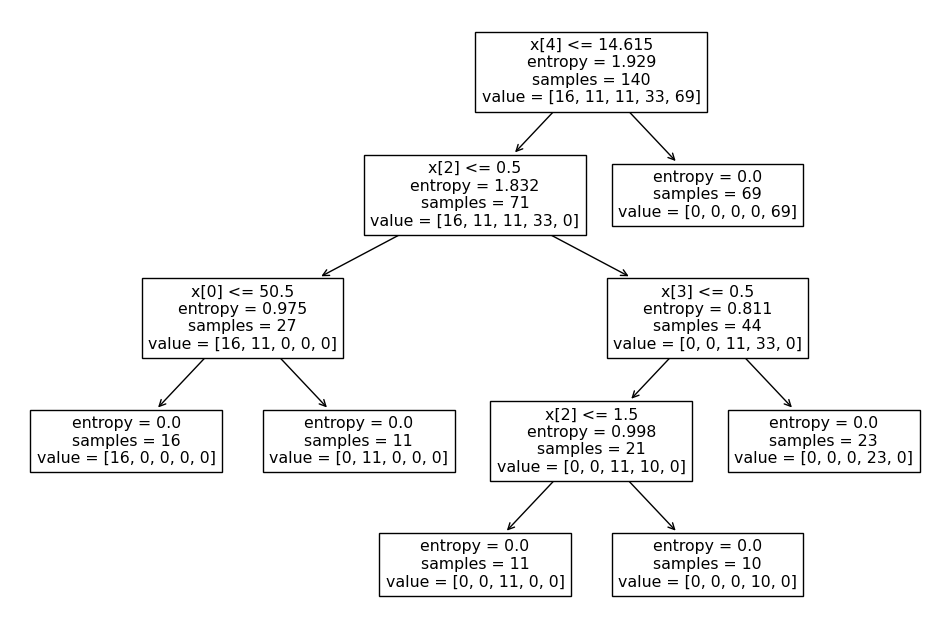

In [78]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(drugTree)
plt.show()